In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255

In [ ]:
autoencoder = Sequential()

autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

In [ ]:
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           5

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 15s 7ms/step - loss: 0.1975 - val_loss: 0.1343
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1242 - val_loss: 0.1147
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1122 - val_loss: 0.1084
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1068 - val_loss: 0.1034
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1033 - val_loss: 0.1006
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1008 - val_loss: 0.0986
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0990 - val_loss: 0.0971
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0976 - val_loss: 0.0957
Epoch 9/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0964 - val_loss: 0.0947
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0955 - val_loss: 0.095

In [ ]:
random_test = np.random.randint(X_test.shape[0], size = 5)

In [ ]:
ae_imgs = autoencoder.predict(X_test)

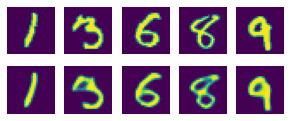

In [ ]:
plt.figure(figsize=(7,2))
for i, image_idx in enumerate(random_test):
  ax=plt.subplot(2, 7, i+1)
  plt.imshow(X_test[image_idx].reshape(28, 28))
  ax.axis('off')
  ax = plt.subplot(2, 7, 7+i+1)
  plt.imshow(ae_imgs[image_idx].reshape(28, 28))
  ax.axis('off')

plt.show()